In [47]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

price_data = pd.read_csv("/Users/andrewlee/NotebookSamples/Datasets/newDailyPricesTechCompanies.csv")


In [48]:
price_data.head()

,date,1. open,2. high,3. low,4. close,5. volume,TickerName
0,2023-10-20,0.8800,0.9000,0.880,0.9000,531677,KSCP
1,2023-10-19,0.9301,0.9500,0.880,0.8802,1023308,KSCP
2,2023-10-18,0.9191,0.9699,0.880,0.9277,638286,KSCP
3,2023-10-17,0.9060,0.9796,0.906,0.9200,773394,KSCP
4,2023-10-16,0.8700,0.9395,0.851,0.9291,701309,KSCP


In [49]:
price_data.columns = ["date", "open", "high", "low", "close", "volume", "TickerName"]
price_data.head()

,date,open,high,low,close,volume,TickerName
0,2023-10-20,0.8800,0.9000,0.880,0.9000,531677,KSCP
1,2023-10-19,0.9301,0.9500,0.880,0.8802,1023308,KSCP
2,2023-10-18,0.9191,0.9699,0.880,0.9277,638286,KSCP
3,2023-10-17,0.9060,0.9796,0.906,0.9200,773394,KSCP
4,2023-10-16,0.8700,0.9395,0.851,0.9291,701309,KSCP


In [50]:
fixed_data = pd.DataFrame()

for ticker in price_data["TickerName"].unique():
    print(ticker)
    
    # Filter the data for the current ticker
    current_ticker_data = price_data[price_data["TickerName"] == ticker]
    
    # Sort the data by date
    current_ticker_data = current_ticker_data.sort_values(by="date", ascending=True, ignore_index=True)
    
    print(current_ticker_data)
    
    # Calculate price change
    dummy = np.array(current_ticker_data["close"])
    per_change = (dummy[:-1] - dummy[1:]) / dummy[:-1]
    
    # Remove the first row
    current_ticker_data = current_ticker_data.iloc[1:, :]

    # Update the 'close' column with price changes
    current_ticker_data["close"] = per_change
    
    # Concatenate the current ticker data to the fixed_data
    fixed_data = pd.concat([fixed_data, current_ticker_data], ignore_index=True)



KSCP
           date     open     high     low    close    volume TickerName
0    2022-01-27  14.4400  15.4800   5.910   5.9100   1608576       KSCP
1    2022-01-28   7.0700  16.2900   6.330  16.2900  26574308       KSCP
2    2022-01-31  19.1551  27.5000  18.350  21.4000  42899912       KSCP
3    2022-02-01  15.9500  17.6000  12.100  12.4400  18493106       KSCP
4    2022-02-02  12.3549  12.3549   9.400   9.5500  12613046       KSCP
..          ...      ...      ...     ...      ...       ...        ...
431  2023-10-16   0.8700   0.9395   0.851   0.9291    701309       KSCP
432  2023-10-17   0.9060   0.9796   0.906   0.9200    773394       KSCP
433  2023-10-18   0.9191   0.9699   0.880   0.9277    638286       KSCP
434  2023-10-19   0.9301   0.9500   0.880   0.8802   1023308       KSCP
435  2023-10-20   0.8800   0.9000   0.880   0.9000    531677       KSCP

[436 rows x 7 columns]
ASST
           date    open    high     low   close   volume TickerName
0    2023-02-03  5.8800  6.9800  3

In [51]:
fixed_data

,date,open,high,low,close,volume,TickerName
0,2022-01-28,7.0700,16.2900,6.3300,-1.756345,26574308,KSCP
1,2022-01-31,19.1551,27.5000,18.3500,-0.313689,42899912,KSCP
2,2022-02-01,15.9500,17.6000,12.1000,0.418692,18493106,KSCP
3,2022-02-02,12.3549,12.3549,9.4000,0.232315,12613046,KSCP
4,2022-02-03,8.9700,10.8000,8.6100,0.070157,8704423,KSCP
...,...,...,...,...,...,...,...
1449,2023-10-16,0.4000,0.4125,0.3800,0.115017,18502,MGAM
1450,2023-10-17,0.3800,0.4050,0.3700,0.026572,61284,MGAM
1451,2023-10-18,0.3650,0.3950,0.3551,0.040000,30250,MGAM
1452,2023-10-19,0.3500,0.3775,0.3400,-0.038851,64087,MGAM


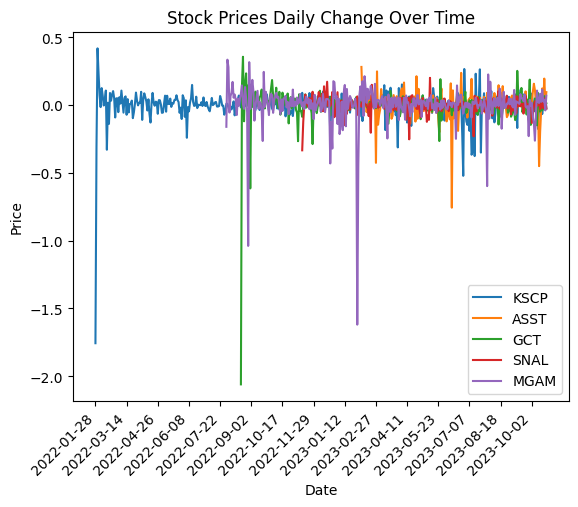

In [60]:
import matplotlib.pyplot as plt

for i in fixed_data["TickerName"].unique():
    
    temporary = fixed_data[fixed_data["TickerName"] == i]

    plt.plot(temporary["date"], temporary["close"], label = i)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.title("Stock Prices Daily Change Over Time")
    plt.xticks(fixed_data["date"].unique()[0:len(fixed_data["date"].unique()):30], rotation = 45, ha = "right")
    


In [54]:
from statsmodels.tsa.stattools import adfuller

results = {}
for i in price_data["TickerName"].unique():
    
    temporary = price_data[price_data["TickerName"] == i]
    
    results[i] = adfuller(temporary["close"])

In [55]:
pd.DataFrame(results)

,KSCP,ASST,GCT,SNAL,MGAM
0,3.555794,0.102589,0.997784,-1.645972,4.64061
1,1.0,0.966237,0.994243,0.459142,1.0
2,18,4,12,0,2
3,417,175,283,236,307
4,"{'1%': -3.446129402876608, '5%': -2.8684960761...","{'1%': -3.4682803641749267, '5%': -2.878201724...","{'1%': -3.453670163592738, '5%': -2.8718077069...","{'1%': -3.4583663275730476, '5%': -2.873866099...","{'1%': -3.4518314994261337, '5%': -2.871000965..."
5,598.272623,-139.958797,995.144539,-360.010609,284.871534
